<a href="https://colab.research.google.com/github/fodaa711/MohamedFouda/blob/main/stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#download the dataset from kaggle
! kaggle datasets download -d fedesoriano/stroke-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
License(s): copyright-authors
  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 33.6MB/s]


In [2]:
! unzip stroke-prediction-dataset.zip

Archive:  stroke-prediction-dataset.zip
  inflating: healthcare-dataset-stroke-data.csv  


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.drop('id', axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
cate_columns = df.select_dtypes(include='object').columns.to_list()

cate_columns

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [10]:
unique_values = {col: df[col].unique() for col in cate_columns}
unique_values

{'gender': array(['Male', 'Female', 'Other'], dtype=object),
 'ever_married': array(['Yes', 'No'], dtype=object),
 'work_type': array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
       dtype=object),
 'Residence_type': array(['Urban', 'Rural'], dtype=object),
 'smoking_status': array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
       dtype=object)}

In [11]:
for col, values in unique_values.items():
    print(f"{col}: {values}")

gender: ['Male' 'Female' 'Other']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [12]:
df[cate_columns].head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [13]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [14]:
df['smoking_status'].replace('Unknown', np.nan, inplace=True)
df['smoking_status'].fillna(df['smoking_status'].mode()[0], inplace=True)

<ipython-input-14-3380a17def90>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['smoking_status'].replace('Unknown', np.nan, inplace=True)
<ipython-input-14-3380a17def90>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [15]:
num_columns = df.select_dtypes(exclude='object').columns.to_list()
num_columns.remove('stroke')

In [16]:
age_bins = [0, 18, 45, 60, 100]
age_labels = ['Child', 'Adult', 'Senior', 'Elderly']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

In [17]:
df['age_group'].head()

,age_group
0,Elderly
1,Elderly
2,Elderly
3,Senior
4,Elderly


In [18]:
df[cate_columns].describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,3
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,3436


In [19]:
df[num_columns].describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000


In [20]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [21]:
df.duplicated().sum()

0

In [22]:
df['stroke'].value_counts(normalize=True)

,proportion
stroke,
0,0.951272
1,0.048728


In [23]:
import seaborn as sns

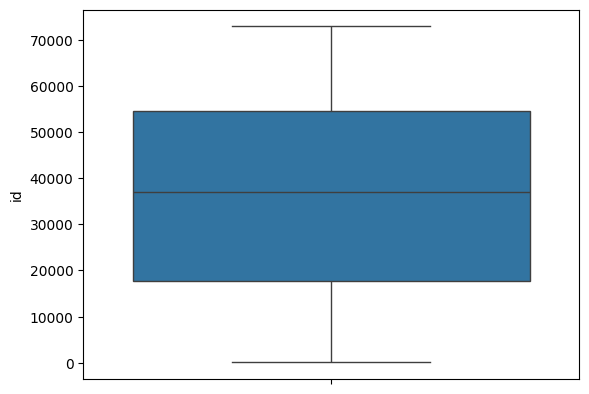

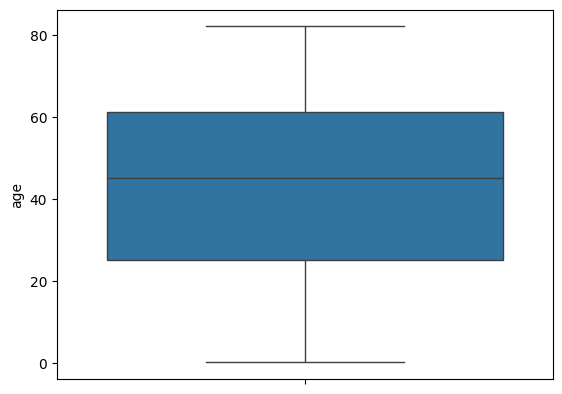

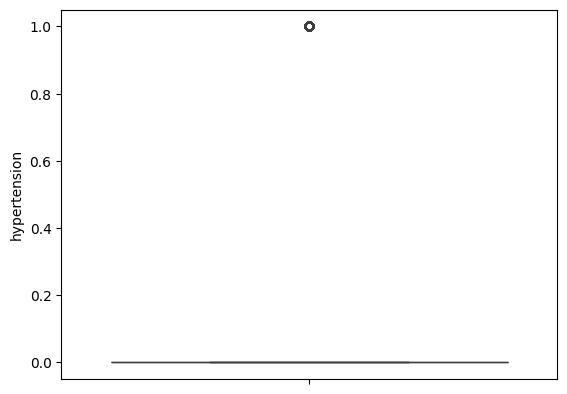

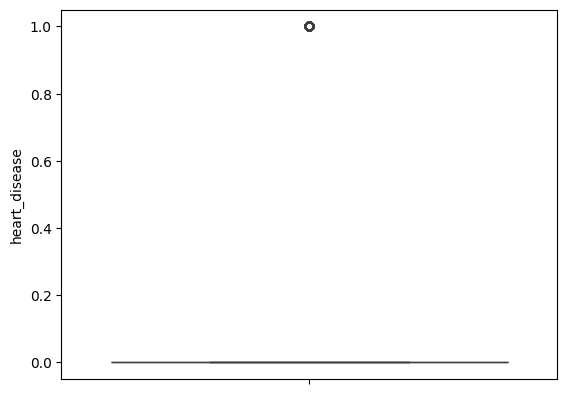

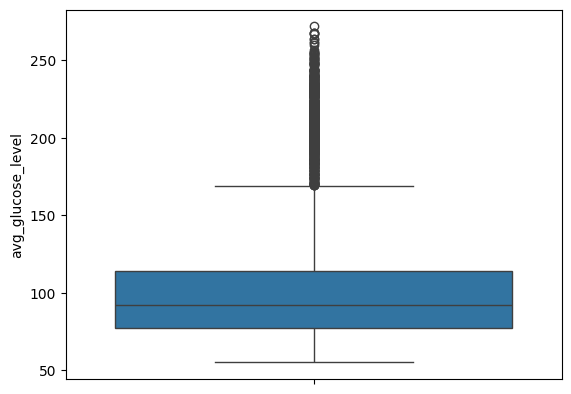

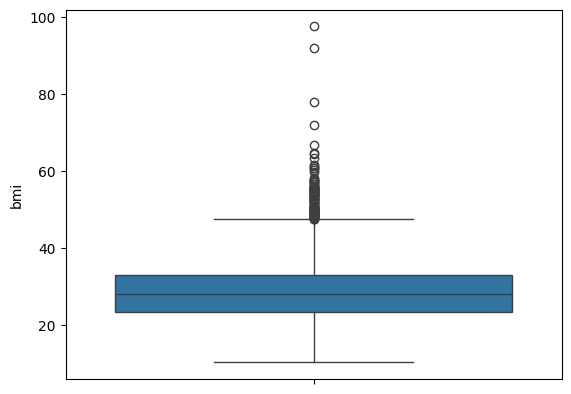

In [24]:
for col in num_columns:
    sns.boxplot(df[col])
    plt.show()

In [25]:
df[num_columns]

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
0,9046,67.0,0,1,228.69,36.6
1,51676,61.0,0,0,202.21,NaN
2,31112,80.0,0,1,105.92,32.5
3,60182,49.0,0,0,171.23,34.4
4,1665,79.0,1,0,174.12,24.0
...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,NaN
5106,44873,81.0,0,0,125.20,40.0
5107,19723,35.0,0,0,82.99,30.6
5108,37544,51.0,0,0,166.29,25.6


In [26]:
num_columns

['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [27]:
cate_columns

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [28]:
x = df.drop('stroke', axis=1)
y = df['stroke']

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Numerical pipeline
num_pipeline = Pipeline([
    ('numerical_inputer', KNNImputer(n_neighbors=5)),
    ('scaler', MinMaxScaler())
])

# Categorical pipeline
cate_pipeline = Pipeline([
    ('one_hot_encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

# Preprocessing: combining both numerical and categorical pipelines
preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_columns),
    ('cate_pipeline', cate_pipeline, cate_columns)
]).set_output(transform='pandas')


# Full pipeline with SMOTE
model_pipeline = ImbPipeline([
    ('preprocessing', preprocessor),  # Step 1: Apply preprocessing (scaling, encoding, etc.)
    ('smote', SMOTETomek(random_state=42)),  # Step 2: Apply SMOTE to resample the training data

])

# Fit and resample the training data using the full pipeline
x_train_resampled, y_train_resampled = model_pipeline.fit_resample(x_train, y_train)

# Transform the test data (without applying SMOTE to test data)
x_test_preprocessed = preprocessor.transform(x_test)

# At this point, you can train your model using x_train_resampled and y_train_resampled.

In [30]:
# Display resampled data info
print(f"Original data shape: {x_train.shape}, Resampled data shape: {x_train_resampled.shape}")

Original data shape: (4088, 12), Resampled data shape: (7774, 20)


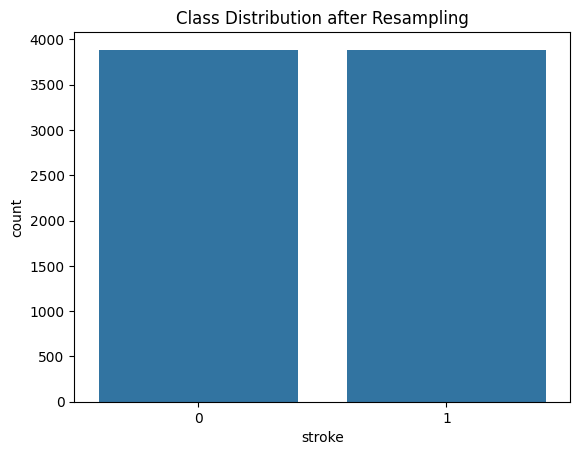

In [31]:
# Optional: Check for class distribution after resampling
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution after Resampling')
plt.show()

In [32]:
x_train_resampled

,num_pipeline__id,num_pipeline__age,num_pipeline__hypertension,num_pipeline__heart_disease,num_pipeline__avg_glucose_level,num_pipeline__bmi,cate_pipeline__gender_Female,cate_pipeline__gender_Male,cate_pipeline__ever_married_No,cate_pipeline__ever_married_Yes,cate_pipeline__work_type_Govt_job,cate_pipeline__work_type_Never_worked,cate_pipeline__work_type_Private,cate_pipeline__work_type_Self-employed,cate_pipeline__work_type_children,cate_pipeline__Residence_type_Rural,cate_pipeline__Residence_type_Urban,cate_pipeline__smoking_status_formerly smoked,cate_pipeline__smoking_status_never smoked,cate_pipeline__smoking_status_smokes
0,0.067153,0.963343,0.000000,0.0,0.265534,0.208477,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.769389,0.755621,0.000000,0.0,0.153264,0.297824,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.748158,0.254643,0.000000,0.0,0.020312,0.268041,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.500542,0.376833,0.000000,0.0,0.048841,0.230241,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.838478,0.376833,0.000000,0.0,0.020820,0.109966,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7769,0.157413,0.901409,1.000000,0.0,0.543935,0.170744,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7770,0.870823,0.975562,0.000000,0.0,0.048287,0.367350,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7771,0.084236,0.929280,0.262569,0.0,0.188929,0.209443,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7772,0.174700,0.703655,0.252837,0.0,0.276952,0.260622,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [33]:
x_train_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7774 entries, 0 to 7773
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   num_pipeline__id                               7774 non-null   float64
 1   num_pipeline__age                              7774 non-null   float64
 2   num_pipeline__hypertension                     7774 non-null   float64
 3   num_pipeline__heart_disease                    7774 non-null   float64
 4   num_pipeline__avg_glucose_level                7774 non-null   float64
 5   num_pipeline__bmi                              7774 non-null   float64
 6   cate_pipeline__gender_Female                   7774 non-null   float64
 7   cate_pipeline__gender_Male                     7774 non-null   float64
 8   cate_pipeline__ever_married_No                 7774 non-null   float64
 9   cate_pipeline__ever_married_Yes                7774 

In [35]:
y_train_resampled

,stroke
0,0
1,0
2,0
3,0
4,0
...,...
7769,1
7770,1
7771,1
7772,1


In [37]:
from re import S
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


In [38]:
# predict the accuracy score using logistic regression in my dataset
logreg_model = LogisticRegression()
logreg_model.fit(x_train_resampled, y_train_resampled)
y_pred = logreg_model.predict(x_test_preprocessed)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7367906066536204


In [59]:
# Decision Tree with cross-validation
dt_model = DecisionTreeClassifier(random_state=42)
cv = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
scores = cross_val_score(dt_model, x_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')

# Fit the model before making predictions
dt_model.fit(x_train_resampled, y_train_resampled) # This line was moved up

train_accuracy =accuracy_score(y_train_resampled, dt_model.predict(x_train_resampled))
print(f"Train Accuracy: {train_accuracy}")
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {np.mean(scores)}")
print(f"Standard deviation: {np.std(scores)}")

y_pred_dt = dt_model.predict(x_test_preprocessed)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
validation_error_dt= 1 - accuracy_dt
print(f"Validation Error: {validation_error_dt}")
print(f"Decision Tree Accuracy: {accuracy_dt}")
print(classification_report(y_test, y_pred_dt))

Train Accuracy: 1.0
Cross-validation scores: [0.90353698 0.9022508  0.8977492  0.89581994 0.8957529 ]
Mean accuracy: 0.899021961787235
Standard deviation: 0.0032671236334136404
Validation Error: 0.16242661448140905
Decision Tree Accuracy: 0.837573385518591
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       960
           1       0.10      0.21      0.14        62

    accuracy                           0.84      1022
   macro avg       0.52      0.54      0.52      1022
weighted avg       0.89      0.84      0.86      1022



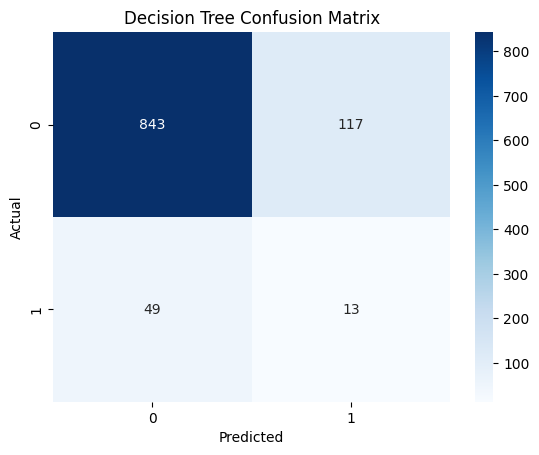

In [56]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [54]:
#  random forest with validation error


# Random Forest with cross-validation and validation error
rf_model = RandomForestClassifier(random_state=42)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores_rf = cross_val_score(rf_model, x_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')
train_accuracy =accuracy_score(y_train_resampled, dt_model.predict(x_train_resampled))
print(f"Train Accuracy: {train_accuracy}")
print(f"Random Forest Cross-validation scores: {scores_rf}")
print(f"Random Forest Mean accuracy: {np.mean(scores_rf)}")
print(f"Random Forest Standard deviation: {np.std(scores_rf)}")

# Train the Random Forest model on the entire training set
rf_model.fit(x_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_rf = rf_model.predict(x_test_preprocessed)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

# Calculate validation error (1 - accuracy)
validation_error_rf = 1 - accuracy_rf
print(f"Random Forest Validation Error: {validation_error_rf}")

print(classification_report(y_test, y_pred_rf))


Train Accuracy: 1.0
Random Forest Cross-validation scores: [0.96720257 0.96463023 0.96334405 0.96527331 0.96010296]
Random Forest Mean accuracy: 0.9641106241749329
Random Forest Standard deviation: 0.0023592785508165415
Random Forest Accuracy: 0.8923679060665362
Random Forest Validation Error: 0.10763209393346385
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       960
           1       0.11      0.11      0.11        62

    accuracy                           0.89      1022
   macro avg       0.53      0.53      0.53      1022
weighted avg       0.89      0.89      0.89      1022



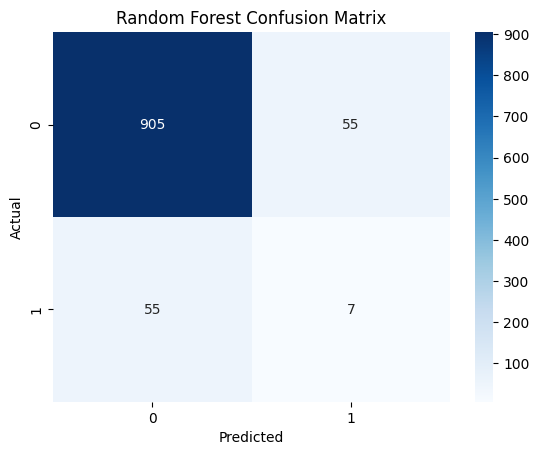

In [57]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [60]:

import xgboost as xgb # Import the xgboost library and alias it as 'xgb'
from xgboost import XGBClassifier # Import the XGBClassifier class from xgboost

# Now you can use XGBClassifier to create your model:
xg_model = XGBClassifier(random_state=42)  # Use XGBClassifier instead of xgboost
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores_xg = cross_val_score(xg_model, x_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')
train_accuracy =accuracy_score(y_train_resampled, dt_model.predict(x_train_resampled))
print(f"Train Accuracy: {train_accuracy}")
print(f"XGBoost Cross-validation scores: {scores_xg}")
print(f"XGBoost Mean accuracy: {np.mean(scores_xg)}")
print(f"XGBoost Standard deviation: {np.std(scores_xg)}")
xg_model.fit(x_train_resampled, y_train_resampled)
y_pred_xg = xg_model.predict(x_test_preprocessed)
accuracy_xg = accuracy_score(y_test, y_pred_xg)
validation_error_xg = 1 - accuracy_xg
print(f"Validation Error: {validation_error_xg}")
print(f"XGBoost Accuracy: {accuracy_xg}")
print(classification_report(y_test, y_pred_xg))

Train Accuracy: 1.0
XGBoost Cross-validation scores: [0.95819936 0.95884244 0.95434084 0.95434084 0.95495495]
XGBoost Mean accuracy: 0.9561356855247531
XGBoost Standard deviation: 0.0019709070906414727
Validation Error: 0.10567514677103718
XGBoost Accuracy: 0.8943248532289628
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       960
           1       0.10      0.10      0.10        62

    accuracy                           0.89      1022
   macro avg       0.52      0.52      0.52      1022
weighted avg       0.89      0.89      0.89      1022



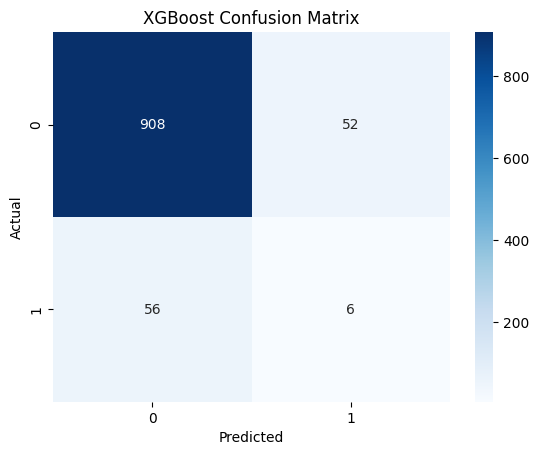

In [58]:
sns.heatmap(confusion_matrix(y_test, y_pred_xg), annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [66]:
svc_model = SVC(random_state=42)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores_svc= cross_val_score(svc_model, x_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')
train_accuracy =accuracy_score(y_train_resampled, dt_model.predict(x_train_resampled))
print(f"Train Accuracy: {train_accuracy}")
print(f"SVC Cross-validation scores: {scores_svc}")
print(f"SVC Mean accuracy: {np.mean(scores_svc)}")
print(f"SVC Standard deviation: {np.std(scores_svc)}")
svc_model.fit(x_train_resampled, y_train_resampled)
y_pred_svc = svc_model.predict(x_test_preprocessed)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
validation_error_svc = 1 - accuracy_svc
print(f"Validation Error: {validation_error_svc}")
print(f"SVC Accuracy: {accuracy_svc}")
print(classification_report(y_test, y_pred_svc))



Train Accuracy: 1.0
SVC Cross-validation scores: [0.86688103 0.85144695 0.86688103 0.87717042 0.85778636]
SVC Mean accuracy: 0.8640331558016445
SVC Standard deviation: 0.008789125102508042
Validation Error: 0.20743639921722112
SVC Accuracy: 0.7925636007827789
              precision    recall  f1-score   support

           0       0.97      0.81      0.88       960
           1       0.16      0.58      0.25        62

    accuracy                           0.79      1022
   macro avg       0.56      0.69      0.57      1022
weighted avg       0.92      0.79      0.84      1022



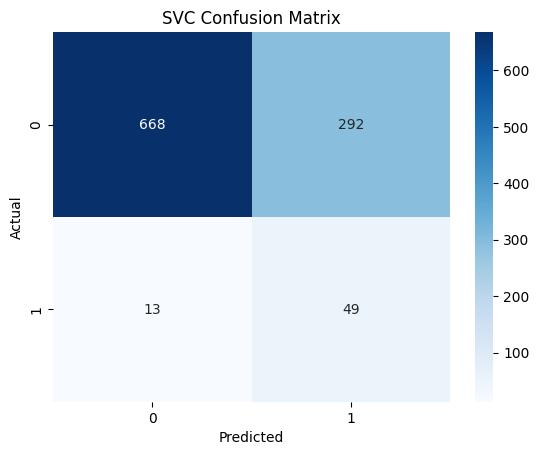

In [76]:
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt='d', cmap='Blues')
plt.title('SVC Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<ipython-input-81-09f7fbee8c8a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=model_results, palette='viridis')


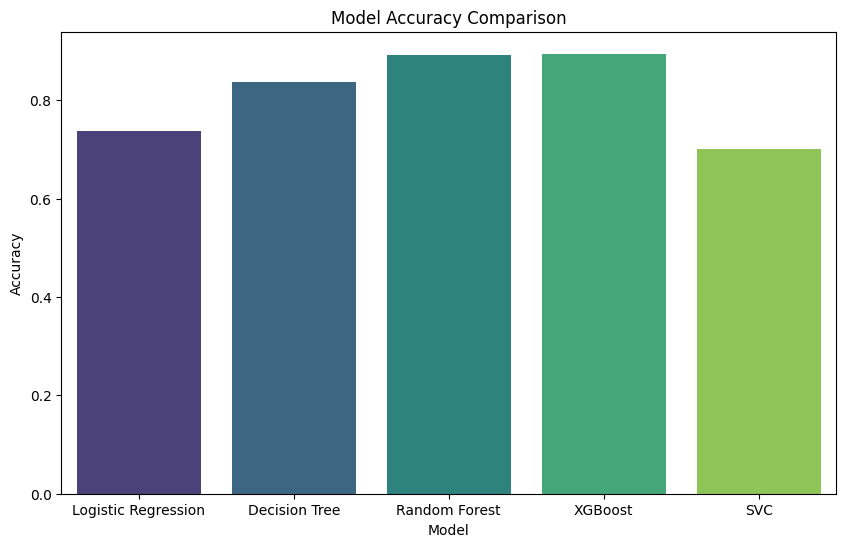

<ipython-input-81-09f7fbee8c8a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Validation Error', data=model_results, palette='viridis')


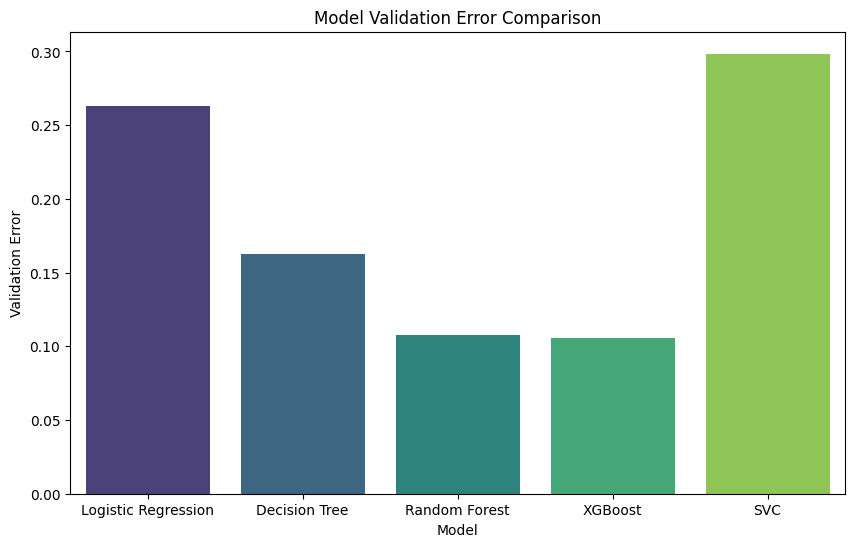

In [81]:

# Store model results in a list of dictionaries
model_results = []
model_results.append({'Model': 'Logistic Regression', 'Accuracy': accuracy, 'Validation Error': 1 - accuracy})
model_results.append({'Model': 'Decision Tree', 'Accuracy': accuracy_dt, 'Validation Error': 1 - accuracy_dt})
model_results.append({'Model': 'Random Forest', 'Accuracy': accuracy_rf, 'Validation Error': validation_error_rf})
model_results.append({'Model': 'XGBoost', 'Accuracy': accuracy_xg, 'Validation Error': validation_error_xg})
model_results.append({'Model': 'SVC', 'Accuracy': accuracy_svc, 'Validation Error': validation_error_svc})


# Convert the list of dictionaries to a Pandas DataFrame
model_results = pd.DataFrame(model_results)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=model_results, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Validation Error', data=model_results, palette='viridis')
plt.title('Model Validation Error Comparison')
plt.ylabel('Validation Error')
plt.show()